<a href="https://colab.research.google.com/github/ARPRAHMAN/AI_Problems/blob/main/AI_W8(Problem)_6168.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Task:

USING heart dataset , apply neural networks,
with 3 hidden netwroks , 11 neurons, output 2 layers, now find out the test accuracy , train, test and display knowledge graph with 3 major features with 20 rows.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Adjust the path to your file location
file_path = '/content/drive/MyDrive/AI_dataset/heart.csv'
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [ ]:
df['sex'].value_counts()

,count
sex,
1,207
0,96


In [ ]:
df['fbs'].value_counts()

,count
fbs,
0,258
1,45


In [ ]:
df['ca'].value_counts()

,count
ca,
0,175
1,65
2,38
3,20
4,5


In [ ]:
df['thal'].value_counts()

,count
thal,
2,166
3,117
1,18
0,2


In [ ]:
cat_like = [c for c in df.columns if df[c].nunique() < 10]
print(cat_like)


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [ ]:
df = pd.get_dummies(df,columns=['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)

In [ ]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [ ]:
x = df.drop(columns=['target'])
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
x_train_scaled

array([[-1.32773282, -1.43641607, -0.57412513, ..., -0.26607604,
         0.8977584 , -0.76948376],
       [ 1.24903178, -1.43641607,  0.83106608, ..., -0.26607604,
         0.8977584 , -0.76948376],
       [ 0.35276583,  0.69617712,  0.47976828, ..., -0.26607604,
         0.8977584 , -0.76948376],
       ...,
       [ 0.12869935,  0.69617712, -0.69122439, ..., -0.26607604,
        -1.11388543,  1.29957258],
       [-0.87959984,  0.69617712,  0.36266901, ..., -0.26607604,
         0.8977584 , -0.76948376],
       [ 0.35276583,  0.69617712, -0.69122439, ..., -0.26607604,
         0.8977584 , -0.76948376]])

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = df.drop(columns=['target'])
input_dim = X.shape[1]
print(input_dim)


22


In [ ]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=22))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(2,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           253 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history= model.fit(x_train_scaled,y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.4581 - loss: 0.7345 - val_accuracy: 0.4490 - val_loss: 0.7607
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4827 - loss: 0.7192 - val_accuracy: 0.4898 - val_loss: 0.7382
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6023 - loss: 0.6867 - val_accuracy: 0.5306 - val_loss: 0.7188
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6297 - loss: 0.6776 - val_accuracy: 0.5510 - val_loss: 0.6999
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6614 - loss: 0.6575 - val_accuracy: 0.5918 - val_loss: 0.6811
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7191 - loss: 0.6154 - val_accuracy: 0.6531 - val_loss: 0.6650
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7100 - loss: 0.6141 - val_accuracy: 0.6735 - val_loss: 0.6480
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7040 - loss: 0.6164 - val_accuracy: 0.6735 - val_loss: 0.6327

In [ ]:
model.layers[0].get_weights()

[array([[-0.2866343 , -0.17880416,  0.08390595, -0.22820425,  0.38493362,
          0.02367848,  0.00877024,  0.15100063, -0.09494254,  0.14304781,
          0.2891889 ],
        [ 0.37413716,  0.0690579 , -0.08516545,  0.2549688 ,  0.20570107,
          0.17818531,  0.01919832,  0.03940907, -0.4237377 , -0.27957126,
         -0.5271777 ],
        [-0.15519744, -0.0389663 , -0.37209624,  0.2580591 ,  0.23699474,
         -0.10171249, -0.25273085, -0.44110084, -0.23265602,  0.25077543,
          0.08909112],
        [-0.02531569, -0.06079309, -0.21582212, -0.3307932 ,  0.29969063,
          0.44952145,  0.13414934,  0.36995956, -0.34622592, -0.1667636 ,
         -0.18993664],
        [-0.37334892,  0.31868014, -0.13545445,  0.47190097, -0.317227  ,
         -0.21489865, -0.34143323,  0.13956173, -0.16375268,  0.00227479,
          0.2606363 ],
        [ 0.22825332, -0.36685675, -0.18987854,  0.3981164 ,  0.48490822,
          0.36198846,  0.08258107,  0.2389262 , -0.32232416, -0.1681995

In [ ]:
model.layers[1].get_weights()

[array([[ 0.40637222,  0.13578266, -0.19577476, -0.57450587,  0.3440686 ,
          0.00559163, -0.3987793 ,  0.4209288 ,  0.37509495, -0.40948758,
          0.2622934 ],
        [-0.0917398 ,  0.08943506,  0.2843738 ,  0.19432843,  0.09369396,
         -0.44938412, -0.06937671,  0.36521345,  0.09389232,  0.02932203,
          0.08675571],
        [-0.40764755, -0.25083145, -0.11588255, -0.25539505,  0.2129979 ,
         -0.23664823,  0.45174515,  0.12647563,  0.0675321 ,  0.50694495,
          0.341643  ],
        [-0.21369754, -0.4417635 , -0.32781184, -0.2370448 ,  0.11245199,
         -0.01856927,  0.48158026, -0.160428  , -0.5600492 ,  0.44274274,
         -0.31463283],
        [ 0.5824809 , -0.24015883, -0.3369202 ,  0.08298472,  0.5379021 ,
          0.31878853, -0.2899685 , -0.33770013, -0.24534556,  0.09706875,
          0.44391942],
        [ 0.5928633 , -0.222455  ,  0.07346312,  0.5284038 ,  0.03228244,
         -0.491986  ,  0.333287  ,  0.02167653,  0.06074877,  0.1057302

# **Predicting Score**



*   First scaled
*   provide value between 0,1



In [ ]:
model.predict(x_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[7.8993922e-01, 2.1006086e-01],
       [7.5926501e-01, 2.4073498e-01],
       [7.7788401e-01, 2.2211599e-01],
       [9.4142061e-01, 5.8579281e-02],
       [9.6022218e-01, 3.9777730e-02],
       [7.2278243e-01, 2.7721742e-01],
       [9.3109632e-01, 6.8903722e-02],
       [8.6387944e-01, 1.3612044e-01],
       [8.6549377e-01, 1.3450627e-01],
       [9.6049935e-01, 3.9500758e-02],
       [9.6869238e-02, 9.0313071e-01],
       [6.0222782e-02, 9.3977726e-01],
       [9.3558586e-01, 6.4414240e-02],
       [9.8632440e-02, 9.0136760e-01],
       [3.9902151e-02, 9.6009779e-01],
       [5.1303959e-01, 4.8696044e-01],
       [6.3021207e-01, 3.6978787e-01],
       [4.2812136e-01, 5.7187861e-01],
       [9.1968608e-01, 8.0313921e-02],
       [9.7391568e-02, 9.0260839e-01],
       [1.4791481e-01, 8.5208511e-01],
       [6.8729025e-01, 3.1270969e-01],
       [9.1376090e-01, 8.6239181e-02],
       [5.7245547e-01, 4.2754450e-01],
       [7.4240208e-02, 9.2575979e-01],
       [8.7715578e-01, 1.

In [ ]:
y_log = model.predict(x_test_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
y_pred = np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_prob = model.predict(x_test_scaled)
y_pred = np.argmax(y_prob, axis=1)

acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Test Accuracy: 0.8688524590163934


# Ploting in Graph

using matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
history.history

{'accuracy': [0.4818652868270874,
  0.5233160853385925,
  0.5958549380302429,
  0.6424870491027832,
  0.6735751032829285,
  0.6994818449020386,
  0.7150259017944336,
  0.7150259017944336,
  0.7253885865211487,
  0.7357512712478638,
  0.7564767003059387,
  0.7564767003059387,
  0.7564767003059387,
  0.7668393850326538,
  0.7668393850326538,
  0.772020697593689,
  0.7772020697593689,
  0.7772020697593689,
  0.7823834419250488,
  0.787564754486084,
  0.7927461266517639,
  0.7927461266517639,
  0.7979274392127991,
  0.8082901835441589,
  0.8134714961051941,
  0.8134714961051941,
  0.818652868270874,
  0.8238341808319092,
  0.8238341808319092,
  0.818652868270874,
  0.8238341808319092,
  0.8290155529975891,
  0.8290155529975891,
  0.8290155529975891,
  0.8341968655586243,
  0.8445596098899841,
  0.8497409224510193,
  0.8497409224510193,
  0.8497409224510193,
  0.8549222946166992,
  0.8497409224510193,
  0.8549222946166992,
  0.8549222946166992,
  0.8601036071777344,
  0.8652849793434143,
  

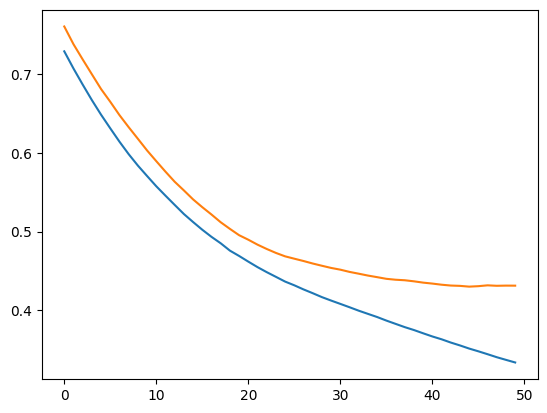

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

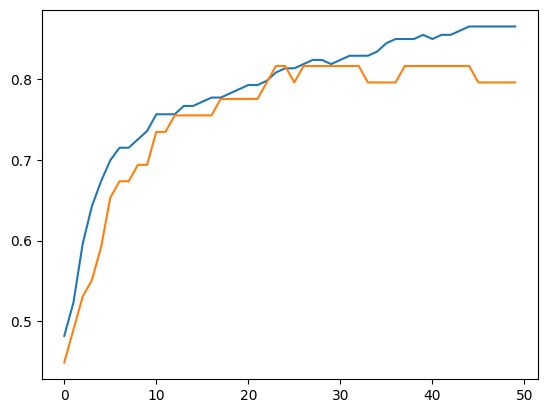

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# **Knowledge Graph**

In [ ]:
# FIXED target column
target_col = "target"

In [ ]:
# Find top-3 features by absolute correlation with the target
corrs = df.corr()[target_col].abs().sort_values(ascending=False).drop(target_col, errors="ignore")
top3 = corrs.index[:3].tolist()
if len(top3) < 3:
    top3 = df.drop(columns=[target_col]).columns.tolist()[:3]

print("Top-3 features:", top3)


Top-3 features: ['thal_2', 'thal_3', 'exang_1']


In [ ]:
# ----------------------- 20 Row Sample -----------------------
# 20-row sample
sample_df = df[top3 + [target_col]].head(20).reset_index(drop=True)
print("\n20-row sample (top3 features + target):")
print(sample_df.to_string(index=False))


20-row sample (top3 features + target):
 thal_2  thal_3  exang_1  target
  False   False    False       1
   True   False    False       1
   True   False    False       1
   True   False    False       1
   True   False     True       1
  False   False    False       1
   True   False    False       1
  False    True    False       1
  False    True    False       1
   True   False    False       1
   True   False    False       1
   True   False    False       1
   True   False    False       1
   True   False     True       1
   True   False    False       1
   True   False    False       1
   True   False    False       1
   True   False    False       1
   True   False    False       1
   True   False    False       1


In [ ]:
import networkx as nx
from scipy.spatial.distance import pdist, squareform

In [ ]:
# --- Build k-NN graph ---
k = 3  # neighbors per node; try 2 or 4 if you like
feat = sample_df[top3].values.astype(float)
n = len(feat)
if n < 2:
    raise SystemExit("Not enough rows for graph")

# pairwise distances
dists = squareform(pdist(feat, metric="euclidean"))

G = nx.Graph()
# add nodes with labels
for i, row in sample_df.iterrows():
    G.add_node(i, label=f"r{i}_t{int(row[target_col])}", **{f: float(row[f]) for f in top3}, target=int(row[target_col]))

# connect each node to its k nearest neighbours (undirected)
for i in range(n):
    # argsort distances; skip self at index 0
    neighbours = np.argsort(dists[i])[1:k+1]
    for j in neighbours:
        if not G.has_edge(i, int(j)):
            G.add_edge(i, int(j), weight=float(1.0 / (dists[i, int(j)] + 1e-6)))

print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())

Nodes: 20 Edges: 57


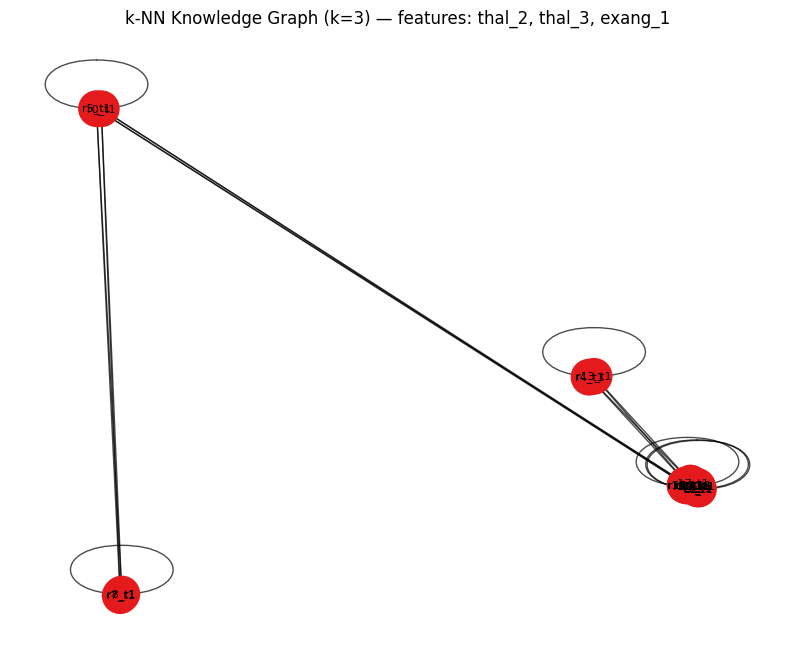

In [ ]:
# --- Plot graph ---
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, seed=42)
node_colors = [sample_df.loc[n, target_col] for n in G.nodes()]
labels = {n: G.nodes[n]["label"] for n in G.nodes()}
nx.draw_networkx_nodes(G, pos, node_size=650, cmap=plt.cm.Set1, node_color=node_colors)
nx.draw_networkx_labels(G, pos, labels, font_size=8)
nx.draw_networkx_edges(G, pos, alpha=0.7)
plt.title(f"k-NN Knowledge Graph (k={k}) — features: " + ", ".join(top3))
plt.axis("off")
plt.show()

In [ ]:
# --- Feature description for the 20 rows ---
print("\nDescription of the 3 major features (20-row sample):")
for f in top3:
    vals = sample_df[f].astype(float)
    print(f"- {f}: mean={vals.mean():.3f}, std={vals.std():.3f}, min={vals.min():.3f}, max={vals.max():.3f}")



Description of the 3 major features (20-row sample):
- thal_2: mean=0.800, std=0.410, min=0.000, max=1.000
- thal_3: mean=0.100, std=0.308, min=0.000, max=1.000
- exang_1: mean=0.100, std=0.308, min=0.000, max=1.000


# **Better visual**

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import plotly.graph_objects as go
from scipy.spatial.distance import pdist, squareform
import random

# ---------------- Load dataset ----------------
target_col = "target"

# ---------------- Top 3 features ----------------
corrs = df.corr()[target_col].abs().sort_values(ascending=False).drop(target_col, errors="ignore")
top3 = corrs.index[:3].tolist()
print("Top 3 features:", top3)

# ---------------- Sample 20 rows ----------------
sample_df = df[top3 + [target_col]].head(20).reset_index(drop=True)
feat = sample_df[top3].values.astype(float)
n = len(sample_df)

# ---------------- Distance (for kNN) ----------------
d = squareform(pdist(feat, metric="euclidean"))
k = 3  # number of neighbors

# ---------------- Build Graph ----------------
G = nx.Graph()

# random attractive node colors (rainbow palette)
color_palette = [
    "#EF476F", "#FFD166", "#06D6A0", "#118AB2", "#073B4C",
    "#8E44AD", "#3498DB", "#E67E22", "#2ECC71", "#E74C3C",
    "#1ABC9C", "#9B59B6", "#F1C40F", "#D35400", "#A93226",
    "#7D3C98", "#2874A6", "#17A589", "#229954", "#A04000"
]

# Add nodes
for i in range(n):
    node_color = color_palette[i % len(color_palette)]
    G.add_node(i,
               label=f"Row {i}",
               color=node_color,
               border="#FFFFFF",
               size=18,
               target=int(sample_df.loc[i, target_col]))

# Add kNN edges
for i in range(n):
    neighbors = np.argsort(d[i])[1:k+1]
    for j in neighbors:
        G.add_edge(i, int(j), weight=1/(d[i, int(j)] + 1e-6))

# ---------------- Plotly Layout ----------------
pos = nx.spring_layout(G, seed=42, k=1)

edge_x = []
edge_y = []
for u, v in G.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=1.8, color='rgba(150,150,150,0.5)'),
    hoverinfo='none'
)

node_x = []
node_y = []
node_color = []
node_text = []
node_border = []
node_size = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_color.append(G.nodes[node]['color'])
    node_border.append(G.nodes[node]['border'])
    node_size.append(G.nodes[node]['size'])

    vals = sample_df.loc[node, top3].to_dict()
    node_text.append(
        f"<b>Row {node}</b><br>" +
        "<br>".join([f"{k}: {v}" for k, v in vals.items()]) +
        f"<br>Target: {G.nodes[node]['target']}"
    )

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=[f"{i}" for i in G.nodes()],
    textposition="top center",
    hovertext=node_text,
    hoverinfo="text",
    marker=dict(
        size=node_size,
        color=node_color,
        line=dict(width=2, color="white")
    )
)

fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title=f"<b>Colorful k-NN Knowledge Graph (k={k})</b><br>Features: {', '.join(top3)}",
    showlegend=False,
    width=900,
    height=700,
    paper_bgcolor="#f9f9f9",
    plot_bgcolor="#f9f9f9",
    font=dict(size=12)
)

fig.show()


Top 3 features: ['thal_2', 'thal_3', 'exang_1']
